## Задание
1. Скачайте датасет House Prices Kaggle со страницы конкурса (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) и сохраните его в том же каталоге, что и ваш скрипт или блокнот **Python**.
2. Загрузите датасет в `pandas DataFrame` под названием `df`.
3. Выполните предварительную обработку данных, выполнив следующие шаги:
<br>a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями).
<br>b. Проверьте и обработайте любые дублирующиеся строки в датасете.
<br>c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).
4. Проведите разведочный анализ данных (**EDA**), ответив на следующие вопросы:
<br>a. Каково распределение целевой переменной `'SalePrice'`? Есть ли какие-либо выбросы?
<br>b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции?
<br>c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как `'OverallQual'`, `'GrLivArea'`, `'GarageCars'` и т.д.
<br>d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.
5. Выполните проектирование признаков путем реализации следующих преобразований:
<br>a. Работайте с категориальными переменными, применяя `one-hot encoding` или `label encoding`, в зависимости от характера переменной.
<br>b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.
6. Сохраните очищенный и преобразованный набор данных в новый **CSV**-файл под названием `'cleaned_house_prices.csv'`.
---

#### 1. Загрузим датасет в pandas DataFrame под названием df

In [1]:
import pandas as pd

Считаем файл `train`, загрузим в датасет и выведем первые пять строк

In [4]:
# Загрузка датасета
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Получим краткую информацию о DataFrame.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Выведем описательную статистику

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 2. Выполним предварительную обработку данных, выполнив следующие шаги:
#### a. Определение и обработка отсутствующих значений
<br>Определим, в каких столбцах есть отсутствующие значения, и решим, как их обработать.

In [7]:
# Проверка на отсутствующие значения
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Показать только столбцы с отсутствующими значениями

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Экспортируем DataFrame в Excel

In [8]:
# Экспорт данных в Excel файл
df.to_excel('train.xlsx', index=False)

**Обработка пропущенных значений**
- Заполним значениями, такими как среднее, медиана или наиболее частое значение.

In [9]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])

- Заполним значениями, основанными на другой логике.

In [10]:
df['Alley'] = df['Alley'].fillna('No Alley')
df['BsmtQual'] = df['BsmtQual'].fillna('No Basement')
df['PoolQC'] = df['PoolQC'].fillna('Is unknown')
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MiscFeature'] = df['MiscFeature'].fillna('Is unknown')
df['Fence'] = df['Fence'].fillna('Is unknown')

**Проверка данных после обработки**

In [11]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


заключительная очистка

In [12]:
# Обработаем остальные отсутствующие значения:
# - Заполним числовые столбцы медианой
# - Заполним категориальные столбцы модой

for column in df.columns:
    if df[column].dtype == 'object':
        mode = df[column].mode()[0]
        df[column] = df[column].fillna(mode)
    else:
        median = df[column].median()
        df[column] = df[column].fillna(median)

**Окончательная проверка**

In [13]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


#### b. Проверка и обработка дублирующихся строк

In [14]:
# Проверка на дублирующиеся строки
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [15]:
# Удаление дублирующихся строк, если они есть
df.drop_duplicates(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### c. Анализ и преобразование типов данных

In [17]:
# Анализ типов данных
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


Посмотрим какой тип данных, сколько имеет по количеству столбцов

In [18]:
print("Количество столбцов каждого типа данных:")
print(df.dtypes.value_counts())

Количество столбцов каждого типа данных:
object     43
int64      35
float64     3
Name: count, dtype: int64


Посмотрим какие именно столбцы имеют тип `float64`

In [19]:
object_columns_list = [col for col in df.columns if df[col].dtype == 'float64']
df_object_columns_1 = df[object_columns_list]
print("Столбцы с типом данных float64:")
print(df_object_columns_1)

Столбцы с типом данных float64:
      LotFrontage  MasVnrArea  GarageYrBlt
0            65.0       196.0       2003.0
1            80.0         0.0       1976.0
2            68.0       162.0       2001.0
3            60.0         0.0       1998.0
4            84.0       350.0       2000.0
...           ...         ...          ...
1455         62.0         0.0       1999.0
1456         85.0       119.0       1978.0
1457         66.0         0.0       1941.0
1458         68.0         0.0       1950.0
1459         75.0         0.0       1965.0

[1460 rows x 3 columns]


Выведем столбцы с типом `object`

In [20]:
object_columns_list = [col for col in df.columns if df[col].dtype == 'object']
df_object_columns_3 = df[object_columns_list]
print("Столбцы с типом данных object:")
print(df_object_columns_3)

Столбцы с типом данных object:
     MSZoning Street     Alley LotShape LandContour Utilities LotConfig  \
0          RL   Pave  No Alley      Reg         Lvl    AllPub    Inside   
1          RL   Pave  No Alley      Reg         Lvl    AllPub       FR2   
2          RL   Pave  No Alley      IR1         Lvl    AllPub    Inside   
3          RL   Pave  No Alley      IR1         Lvl    AllPub    Corner   
4          RL   Pave  No Alley      IR1         Lvl    AllPub       FR2   
...       ...    ...       ...      ...         ...       ...       ...   
1455       RL   Pave  No Alley      Reg         Lvl    AllPub    Inside   
1456       RL   Pave  No Alley      Reg         Lvl    AllPub    Inside   
1457       RL   Pave  No Alley      Reg         Lvl    AllPub    Inside   
1458       RL   Pave  No Alley      Reg         Lvl    AllPub    Inside   
1459       RL   Pave  No Alley      Reg         Lvl    AllPub    Inside   

     LandSlope Neighborhood Condition1  ... GarageType GarageFinish 

Сделаем выборку интересующих нас столбцов для дальнейшего анализа  '`OverallQual`', '`GrLivArea`', '`GarageCars`', '`LotArea`', '`Utilities`', '`OverallQual`', '`OverallCond`', '`GarageArea`'

In [21]:
# Выборка интересующих столбцов
selected_columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'LotArea', 'Utilities', 'OverallQual', 'OverallCond', 'GarageArea']

# Получение типов данных выбранных столбцов
print("Типы данных выбранных столбцов:")
print(df[selected_columns].dtypes)

Типы данных выбранных столбцов:
OverallQual     int64
GrLivArea       int64
GarageCars      int64
LotArea         int64
Utilities      object
OverallQual     int64
OverallCond     int64
GarageArea      int64
dtype: object


In [33]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [34]:
le = LabelEncoder()
df['Utilities_Encoded'] = le.fit_transform(df['Utilities'])

# Вывод количества различных значений в столбце 'Utilities_Encoded'
print(df['Utilities_Encoded'].value_counts())
print(df['Utilities'].value_counts())

Utilities_Encoded
0    1459
1       1
Name: count, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64


#### Сохранение обработанного датасета

In [35]:
df.to_csv("processed_dataset.csv", index=False)

### 4. Проведите разведочный анализ данных (**EDA**), ответив на следующие вопросы:
<br>a. Каково распределение целевой переменной `'SalePrice'`? Есть ли какие-либо выбросы?
<br>b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции?
<br>c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как `'OverallQual'`, `'GrLivArea'`, `'GarageCars'` и т.д.
<br>d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.

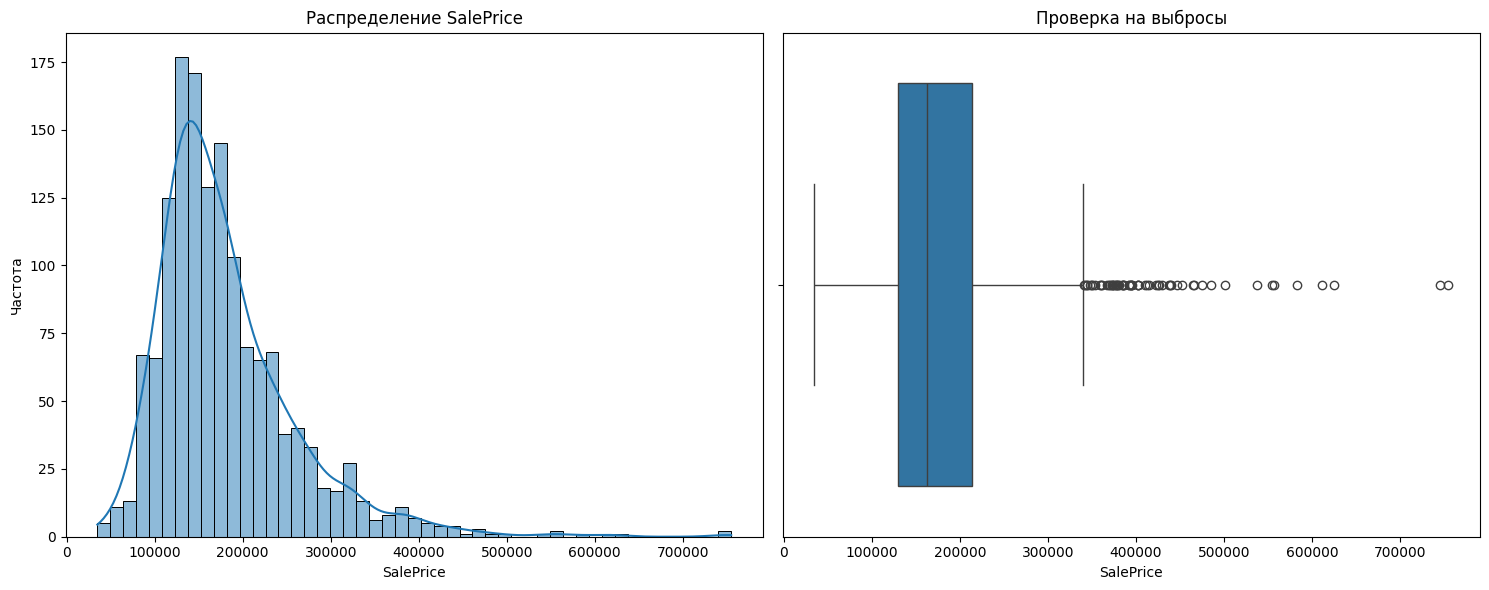

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Создание полотна с двумя графиками (1 строка, 2 столбца)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Распределение целевой переменной
sns.histplot(df['SalePrice'], kde=True, ax=axes[0])
axes[0].set_title('Распределение SalePrice')
axes[0].set_xlabel('SalePrice')
axes[0].set_ylabel('Частота')

# Проверка на выбросы
sns.boxplot(x=df['SalePrice'], ax=axes[1])
axes[1].set_title('Проверка на выбросы')
axes[1].set_xlabel('SalePrice')

# Показать графики
plt.tight_layout()
plt.show()

#### a. Каково распределение целевой переменной `'SalePrice'`? Есть ли какие-либо выбросы?

> Интерпретация Гистограммы (слева):
1. **Форма распределения**
- Распределение цен на продажу схоже с логнормальным распределением, где данные смещены вправо (больше низких и средних значений, и меньше — высоких).
2. **Основная масса данных**:
- Большинство значений цен продаж сосредоточены в диапазоне от 100,000 до 300,000.
3. **Хвост распределения**:
- Левый хвост (ниже 100,000) короткий, что указывает на небольшое количество низких цен.
- Правый хвост (выше 300,000) довольно длинный, что указывает на наличие дорогих объектов недвижимости, хотя они встречаются реже.
> 

> Интерпретация Коробчатой Диаграммы (справа):
1. **Центральная часть**:
- Прямоугольник (box) охватывает межквартильный размах (IQR) данных, то есть диапазон между первым квартилем (25-й перцентиль) и третьим квартилем (75-й перцентиль). Средний уровень (медиана) находится ближе к нижней границе коробки, что также указывает на смещение распределения вправо.
2. **Усы**:
- Усы вытянуты достаточно сильно вправо, что подтверждает наличие большого количества значений выше третьего квартиля. Усы показывают диапазон, в котором данные считаются ненаблюдаемыми выбросами.
3. **Выбросы**:
- Правее конца усов есть несколько значений, которые считаются выбросами и преимущественно находятся в диапазоне 300,000 до 700,000. Это те значения, которые сильно отклоняются от основной массы данных и их количество невелико.
> 

> Общая интерпретация:
  
**Цены на недвижимость**
в данной выборке в основном распределены в пределах от 100,000 до 300,000 с основной массой около 150,000-200,000.
- Есть значительное количество объектов с намного более высокими ценами, которые можно интерпретировать как дорогостоящие дома (выбросы), но их количество значительно меньше.
- Распределение имеет положительную асимметрию (правоевыделенное распределение), что указывает на преобладание более низких и средних значений цен и наличие отдельных дорогих объектов.
> 

Эти данные могут быть полезны для анализа рынка недвижимости, построения моделей оценки стоимости и определения ценовых закономерностей.

#### b. Взаимосвязи между целевой переменной и другими характеристиками

SalePrice            1.000000
OverallQual          0.790982
GrLivArea            0.708624
GarageCars           0.640409
GarageArea           0.623431
TotalBsmtSF          0.613581
1stFlrSF             0.605852
FullBath             0.560664
TotRmsAbvGrd         0.533723
YearBuilt            0.522897
YearRemodAdd         0.507101
MasVnrArea           0.472614
Fireplaces           0.466929
GarageYrBlt          0.466754
BsmtFinSF1           0.386420
LotFrontage          0.334901
WoodDeckSF           0.324413
2ndFlrSF             0.319334
OpenPorchSF          0.315856
HalfBath             0.284108
LotArea              0.263843
BsmtFullBath         0.227122
BsmtUnfSF            0.214479
BedroomAbvGr         0.168213
ScreenPorch          0.111447
PoolArea             0.092404
MoSold               0.046432
3SsnPorch            0.044584
BsmtFinSF2          -0.011378
Utilities_Encoded   -0.014314
BsmtHalfBath        -0.016844
MiscVal             -0.021190
Id                  -0.021917
LowQualFin

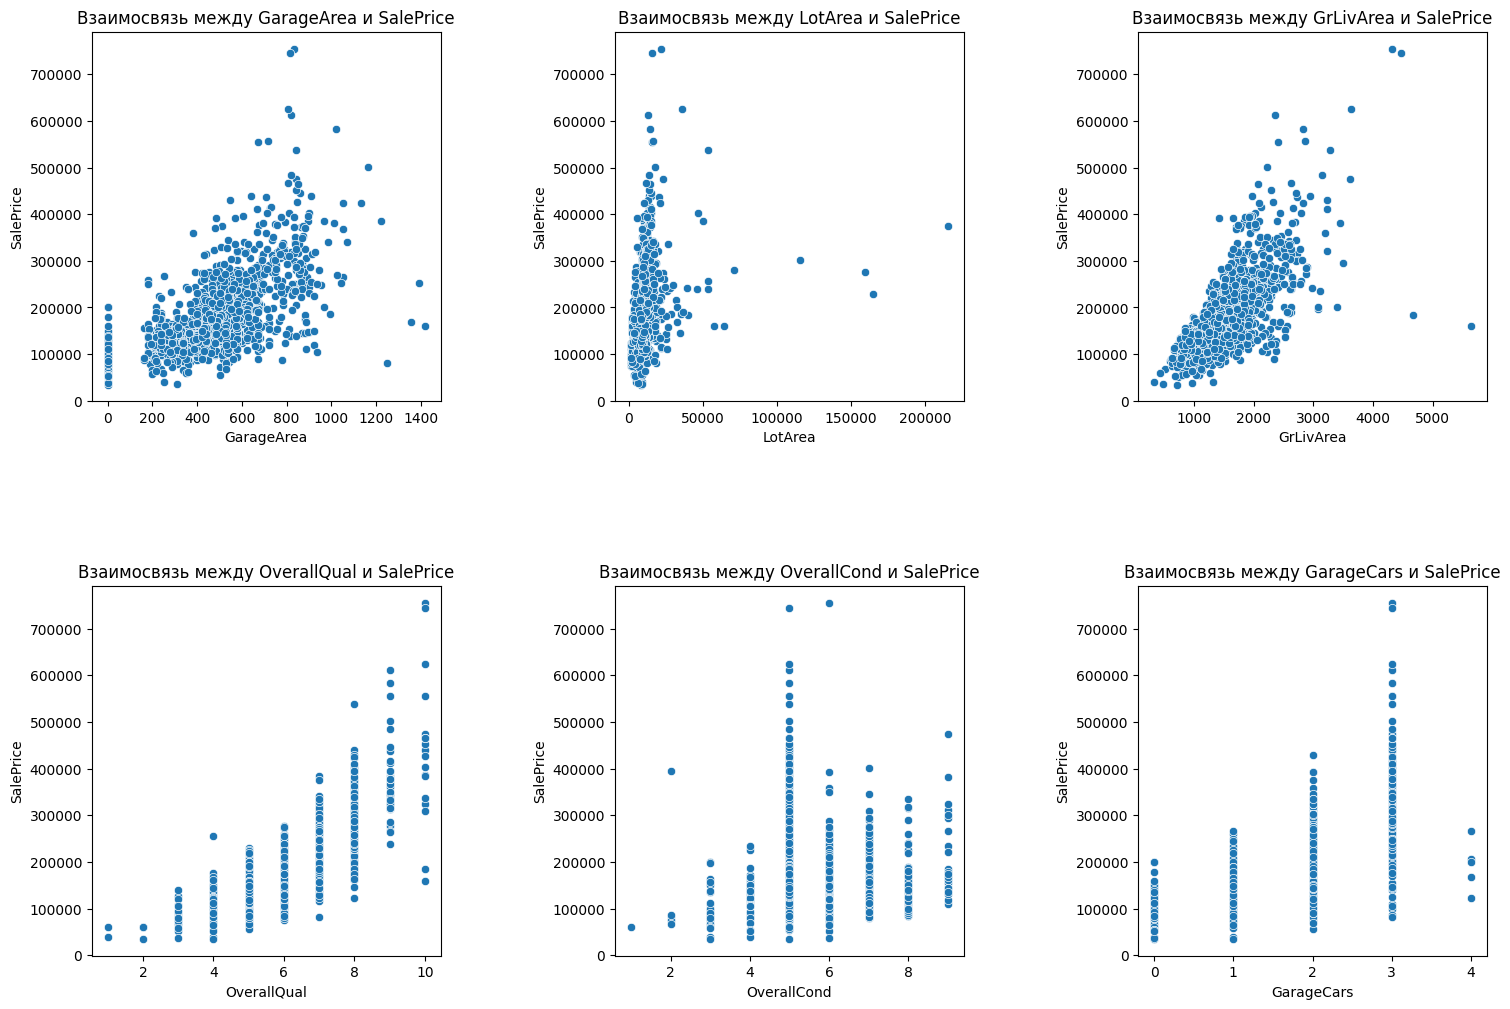

In [40]:
# Исключение нечисловых данных
numeric_df = df.select_dtypes(include=[np.number])

# Корреляционная матрица
corr_matrix = numeric_df.corr(method='pearson')
print(corr_matrix['SalePrice'].sort_values(ascending=False))

# Список интересующих нас переменных
variables = ['GarageArea', 'LotArea', 'GrLivArea', 'OverallQual', 'OverallCond', 'GarageCars']

# Создание сетки графиков 2x3
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Заголовки для графиков
titles = ['GarageArea', 'LotArea', 'GrLivArea', 'OverallQual', 'OverallCond', 'GarageCars']

# Построение графиков
for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    sns.scatterplot(x=var, y='SalePrice', data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Взаимосвязь между {var} и SalePrice')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('SalePrice')

# Настройка пространства между графиками
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Отображение графиков
plt.show()

Рассмотрим каждый график по отдельности:

1. GarageArea vs SalePrice:
   - Наблюдается положительная корреляция. С увеличением площади гаража (GarageArea) увеличивается и цена продажи (SalePrice). Более крупные гаражи, вероятно, повышают стоимость недвижимости.

2. LotArea vs SalePrice:
   - Видим неявную корреляцию. На графике есть некоторый разброс данных, что может указывать на другие переменные, влияющие на цену. В общем, большие участки (LotArea) могут, но не всегда, быть дороже.

3. GrLivArea vs SalePrice:
   - Ярко выраженная положительная корреляция. С увеличением жилой площади (GrLivArea) явно увеличивается цена продажи. Большее жилое пространство обычно считается более ценным.

4. OverallQual vs SalePrice:
   - Четкая положительная корреляция. Повышение качества (OverallQual) недвижимости ведет к значительному увеличению цены продажи. Высокое качество постройки и отделки существенно влияет на стоимость.

5. OverallCond vs SalePrice:
   - Неясная корреляция. На графике видны скопления по разным значениям качества состояния (OverallCond), однако четкой тенденции не видно. Это может указывать, что состояние недвижимости (если не учитывать экстремальные варианты) менее влияет на цену по сравнению с другими факторами.

6. GarageCars vs SalePrice:
   - Положительная корреляция. Увеличение количества гаражных мест (GarageCars) также приводит к росту цены продажи. Наличие большего количества парковочных мест делает недвижимость более привлекательной.

В целом, можно сделать вывод, что некоторые параметры, такие как площадь жилого пространства (GrLivArea), качество недвижимости (OverallQual) и наличие гаража (GarageArea), сильно влияют на цену продажи недвижимости. Другие параметры, такие как общая площадь участка (LotArea) и состояние (OverallCond), влияют на цену в меньшей степени или имеют более сложные взаимосвязи.

#### c. Распределение и взаимосвязи других важных характеристик

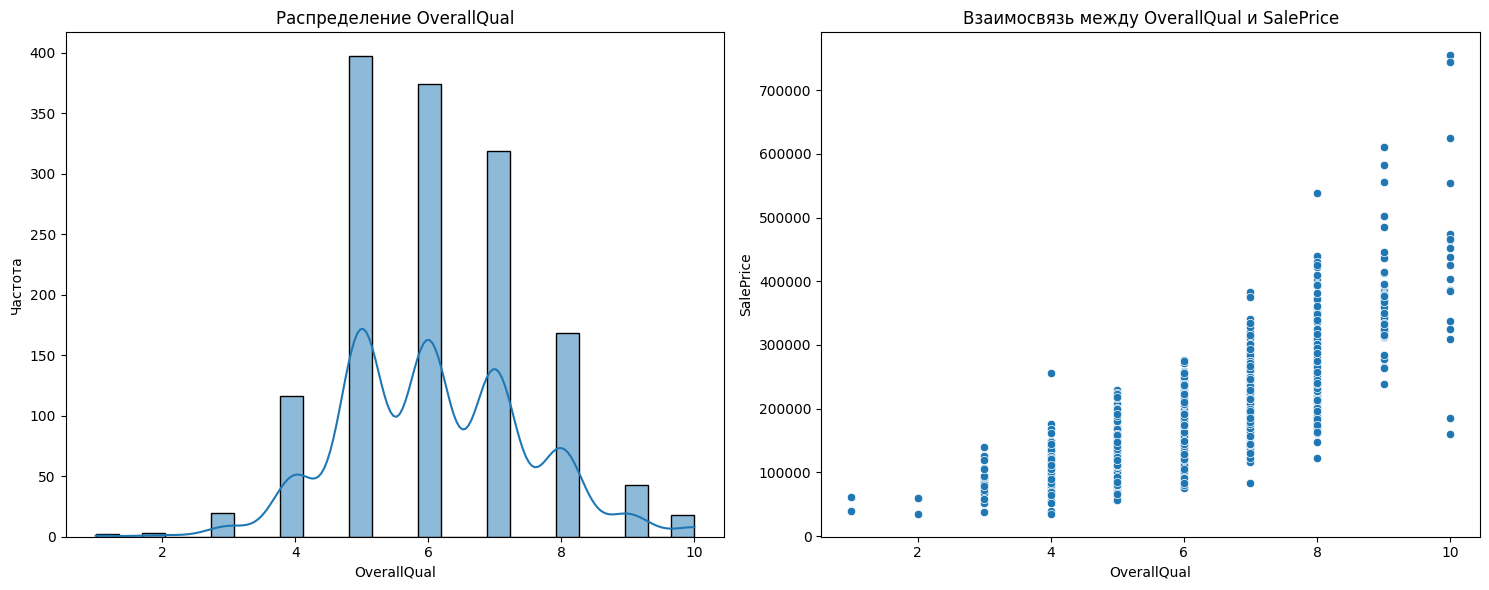

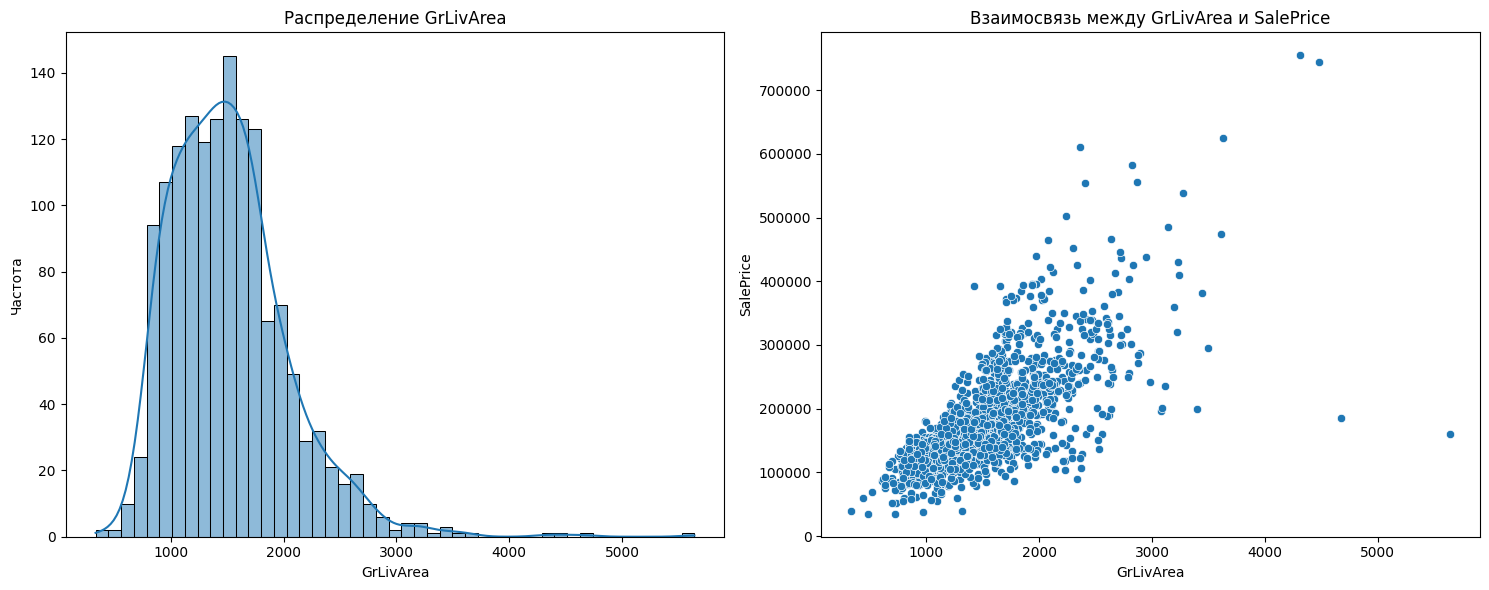

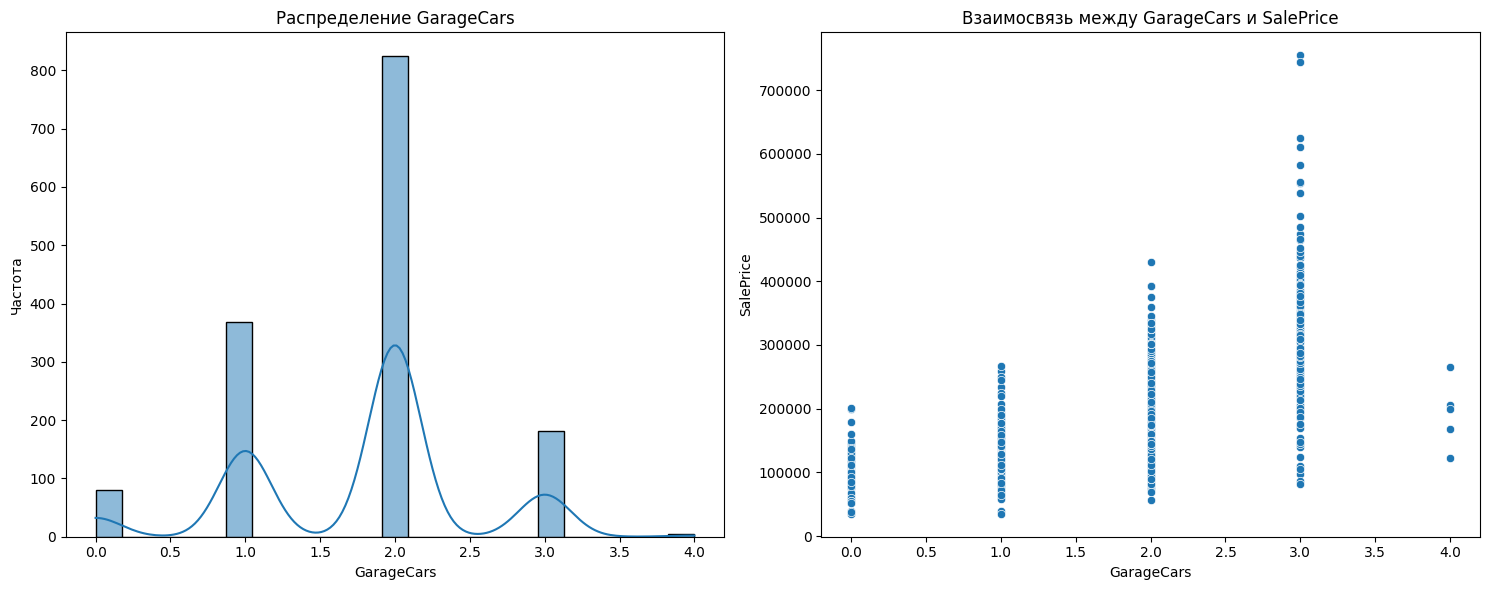

In [43]:
features = ['OverallQual', 'GrLivArea', 'GarageCars']

for feature in features:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Гистограмма
    sns.histplot(df[feature], kde=True, ax=axes[0])
    axes[0].set_title(f'Распределение {feature}')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Частота')
    
    # Диаграмма рассеяния
    sns.scatterplot(x=feature, y='SalePrice', data=df, ax=axes[1])
    axes[1].set_title(f'Взаимосвязь между {feature} и SalePrice')
    axes[1].set_xlabel(feature)
    axes[1].set_ylabel('SalePrice')
    
    plt.tight_layout()
    plt.show()


1. OverallQual (Общая оценка качества):
   - Распределение OverallQual имеет несколько пиков, что указывает на модальность. Видно, что большинство значений находятся между оценками 4 и 8.
   - Взаимосвязь между OverallQual и SalePrice показывает положительную корреляцию. Это означает, что с увеличением оценки качества дома увеличивается и его цена.

2. GrLivArea (Жилая площадь выше уровня земли):
   - Распределение GrLivArea показывает асимметрию справа, что указывает на наличие жилья с очень большой жилой площадью.
   - Взаимосвязь между GrLivArea и SalePrice также показывает положительную корреляцию. Следовательно, увеличенная жилая площадь ведет к увеличению цены продажи.

3. GarageCars (Количество машин в гараже):
   - Распределение GarageCars также имеет несколько пиков. Большинство значений находятся в интервале 2-3 мащин.
   - Взаимосвязь между GarageCars и SalePrice показывает слабую положительную корреляцию. Это означает, что количество машин в гараже влияет на цену, но не столь значительно, как предыдущие параметры.

Выводы:
- Наибольшее влияние на цену имеют показатели OverallQual и GrLivArea, что иллюстрируется сильной положительной корреляцией.
- Количество машин, которые может вместить гараж, влияет на цену дома меньше по сравнению с двумя другими параметрами, хотя всё ещё есть положительная корреляция.
- Важно отметить, что для более точных выводов стоило бы рассмотреть дополнительные параметры и использовать более сложные аналитические методы.


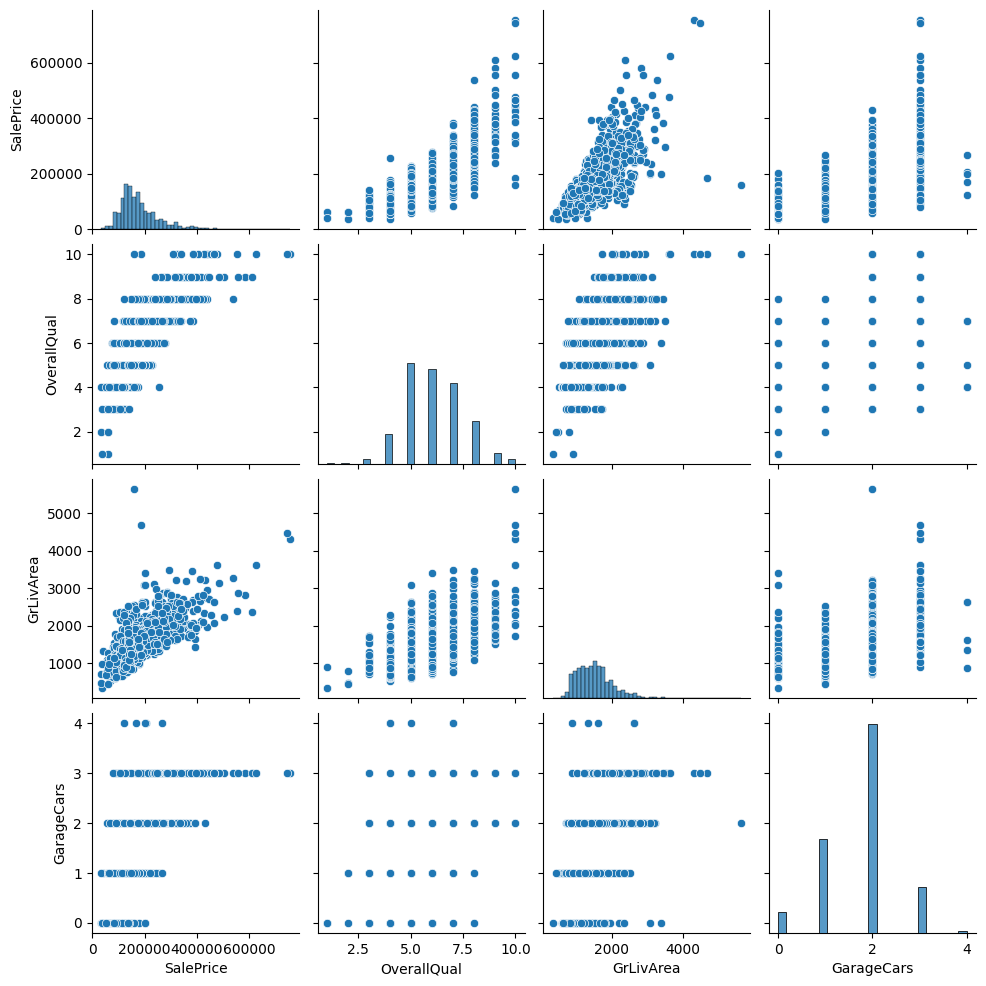

In [45]:
# Парные диаграммы
sns.pairplot(df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']])
plt.show()

> Парные диаграммы дают полезную информацию о взаимосвязях между парами переменных, их распределении и наличии каких-либо выбросов. Рассмотрим основные аспекты, которые можно заметить:
> 
> 1. **Взаимосвязи между переменными:**
> - **SalePrice и OverallQual:** Есть положительная взаимосвязь — дома с более высоким качеством (OverallQual) чаще всего имеют более высокую стоимость (SalePrice).
> - **SalePrice и GrLivArea:** Аналогично, существует положительная взаимосвязь — дома с большей жилой площадью (GrLivArea) имеют тенденцию к более высокой стоимости (SalePrice).
> - **SalePrice и GarageCars:** Тоже присутствует положительная взаимосвязь — дома с большим количеством мест в гараже (GarageCars) имеют более высокую стоимость (SalePrice).
> - **OverallQual и GrLivArea:** Можно видеть положительную взаимосвязь — чем выше качество дома, тем больше его жилая площадь.
> - **GrLivArea и GarageCars:** Тоже наблюдается положительная зависимость — дома с большей жилой площадью часто имеют больше мест в гараже.
> 1. **Распределение переменных:**
> - **SalePrice:** Распределение стоимости дома (слева наверху) показывает, что большинство домов имеет цену ниже примерно 300,000, с длинным "хвостом" к более высоким значениям.
> - **OverallQual:** Показатели качества дома распределены более центрально с модальным значением где-то около 5-7.
> - **GrLivArea:** Жилая площадь большинства домов сконцентрирована в диапазоне от 1000 до 2000 квадратных футов.
> - **GarageCars:** Большинство домов имеют от 1 до 2 мест в гараже.
> 1. **Выбросы:** - Некоторые графики показывают отдельные точки, удаленные от основной массы данных. Например, в графике SalePrice vs GrLivArea видны несколько домов с очень большой площадью и высокой стоимостью, которые могут классифицироваться как выбросы.
> 
> Эти визуализации могут помочь анализировать основные тенденции и взаимосвязи в данных, а также выявлять аномалии, которые могут потребовать дополнительного рассмотрения.
>

In [46]:
from scipy.stats import shapiro
from sklearn.ensemble import RandomForestRegressor

In [47]:
# Проверка нормальности распределения SalePrice
stat, p = shapiro(df['SalePrice'])
print(f'Shapiro-Wilk Test: Statistics={stat}, p-value={p}')

Shapiro-Wilk Test: Statistics=0.8696714665902145, p-value=3.2061412312021656e-33


На основе результатов теста Шапиро-Уилка можно сделать следующий вывод:

- Статистика теста Шапиро-Уилка составила 0.8696714665902145.
- Значение p-value составляет 3.2061423112021656e-33, что значительно меньше 0.05.

Поскольку p-value намного меньше 0.05, нулевая гипотеза о нормальности распределения отклоняется. Таким образом, можно сделать вывод, что распределение переменной SalePrice значительно отличается от нормального распределения.

#### Машинное обучение:

In [48]:
# Feature Importance с Random Forest
X = df[['OverallQual', 'GrLivArea', 'GarageCars']]
y = df['SalePrice']
model = RandomForestRegressor()
model.fit(X, y)
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

       Feature  Importance
0  OverallQual    0.635711
1    GrLivArea    0.309991
2   GarageCars    0.054298


В данном случае, три признака ('`OverallQual`', '`GrLivArea`', '`GarageCars`') были использованы для предсказания значения '`SalePrice`'.

Результаты показывают, насколько каждый из признаков важен для модели при предсказании целевой переменной ('`SalePrice`'). Чем больше значение важности, тем более значим этот признак для модели.

Из таблицы видно следующее:
1. '`OverallQual`' имеет важность 0.635711, что делает его самым значимым признаком.
2. '`GrLivArea`' имеет важность 0.309091, являясь вторым по значимости признаком.
3. '`GarageCars`' имеет важность 0.054298, что делает его наименее значимым из трех рассматриваемых признаков.

Таким образом, можно сделать вывод, что качество общей оценки ('`OverallQual`') является наиболее значимым фактором при предсказании цены продажи ('`SalePrice`'), в то время как количество машиномест в гараже ('`GarageCars`') оказывает наименьшее влияние из триады рассматриваемых факторов.

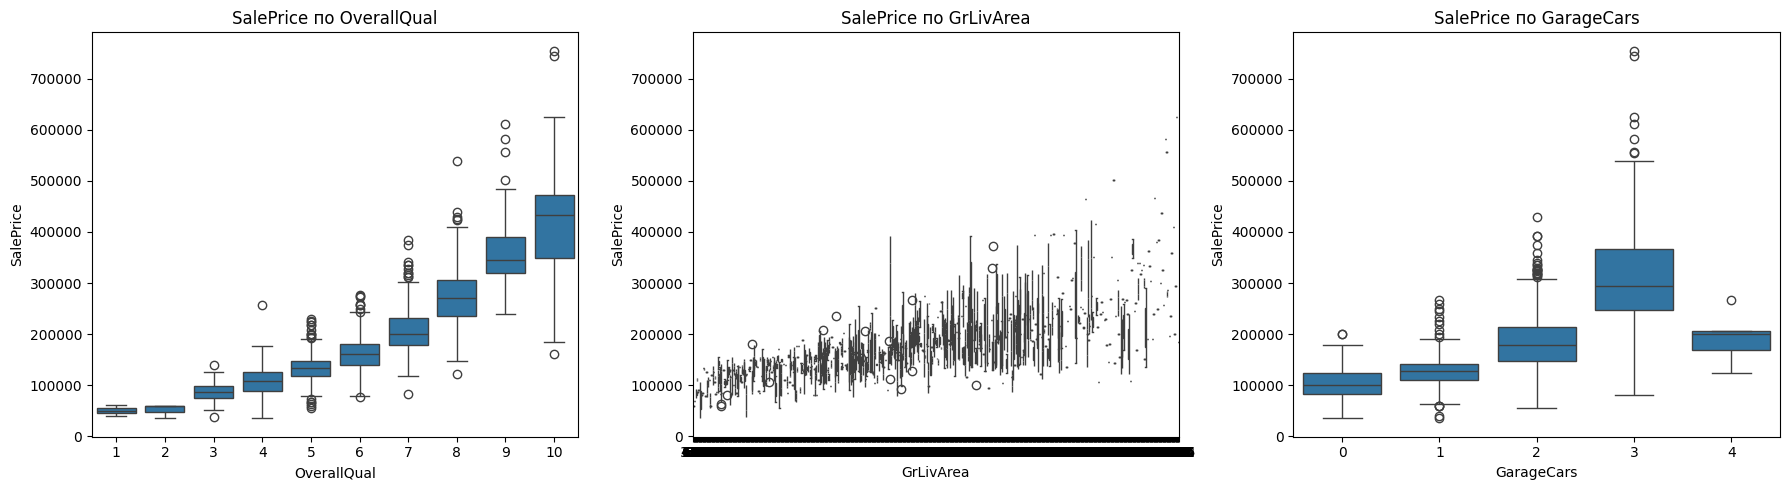

In [49]:
# Квадратные диаграммы для анализа распределения
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(y='SalePrice', x='OverallQual', data=df, ax=axes[0])
axes[0].set_title('SalePrice по OverallQual')

sns.boxplot(y='SalePrice', x='GrLivArea', data=df, ax=axes[1])
axes[1].set_title('SalePrice по GrLivArea')

sns.boxplot(y='SalePrice', x='GarageCars', data=df, ax=axes[2])
axes[2].set_title('SalePrice по GarageCars')

plt.tight_layout()
plt.show()

1. График слева (SalePrice по OverallQual):
   - OverallQual — это общее качество дома.
   - На этом графике видно, что чем выше класс качества дома (от 1 до 10), тем выше вероятность того, что стоимость продажи будет выше.
   - График показывает возрастающую зависимость: дома с низким рейтингом качества, как правило, продаются дешевле, а дома с высоким рейтингом качества дороже.

2. График в середине (SalePrice по GrLivArea):
   - GrLivArea — это общая жилая площадь дома.
   - График показывает почти линейную положительную зависимость: чем больше жилая площадь дома, тем выше его стоимость. Однако, видно, что разброс цен увеличивается по мере увеличения площади.
   - Есть несколько выбросов, что может указывать на дома с необычно высокой или низкой стоимостью для их площади.

3. График справа (SalePrice по GarageCars):
   - GarageCars — это количество автомобилей, которое может вместить гараж.
   - Этот график показывает, что с увеличением количества машиномест в гараже, как правило, увеличивается и стоимость дома.
   - Самые высокие цены наблюдаются для домов, у которых 3 или 4 машиноместа, в то время как отсутствие гаража или только 1 машиноместо связано с более низкими ценами.

Вывод: Стоимость продажи жилья зависит от качества дома, жилой площади и количества машиномест в гараже. Лучше качество, большая площадь и наличие большего количества машиномест в гараже приводят к более высокой стоимости продажи.

### 5. Выполните проектирование признаков путем реализации следующих преобразований:
<br>a. Работайте с категориальными переменными, применяя `one-hot encoding` или `label encoding`, в зависимости от характера переменной.
<br>b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.


In [63]:
# Посмотрим текущие столбцы в DataFrame
print(df.columns)

Index(['Id', 'LotFrontage', 'LotArea', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enc

1.  Определим категориальные переменные

Категориальные переменные имеют тип данных `object`(текстовые).

In [64]:
categorical_cols = df.select_dtypes(include=['object']).columns

2. Применим One-Hot Encoding (Дамми-кодирование)

Мы будем использовать One-Hot Encoding для номинальных признаков (хорошо, когда переменные не упорядочены).

In [65]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

#### Создание новых характеристик

1. Создаем характеристику "Общая площадь" (если есть площадь помещений): Например, потенциально можно объединить площадь различных жилых помещений, если такие столбцы имеются.

In [66]:
df['TotalArea'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['GrLivArea'] + df['TotalBsmtSF']

2. Создаем характеристику "Возраст объекта недвижимости". Мы будем использовать год продажи (`YrSold`) и год постройки (`YearBuilt`).

In [67]:
df['Age'] = df['YrSold'] - df['YearBuilt']

In [68]:
print(df.head())


   Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1         65.0     8450            7            5       2003   
1   2         80.0     9600            6            8       1976   
2   3         68.0    11250            7            5       2001   
3   4         60.0     9550            7            5       1915   
4   5         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_New  \
0          2003       196.0         706           0  ...         False   
1          1976         0.0         978           0  ...         False   
2          2002       162.0         486           0  ...         False   
3          1970         0.0         216           0  ...         False   
4          2000       350.0         655           0  ...         False   

   SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0         False         True                  False                 F

#### Scatter Plot для `TotalArea` и `SalePrice`

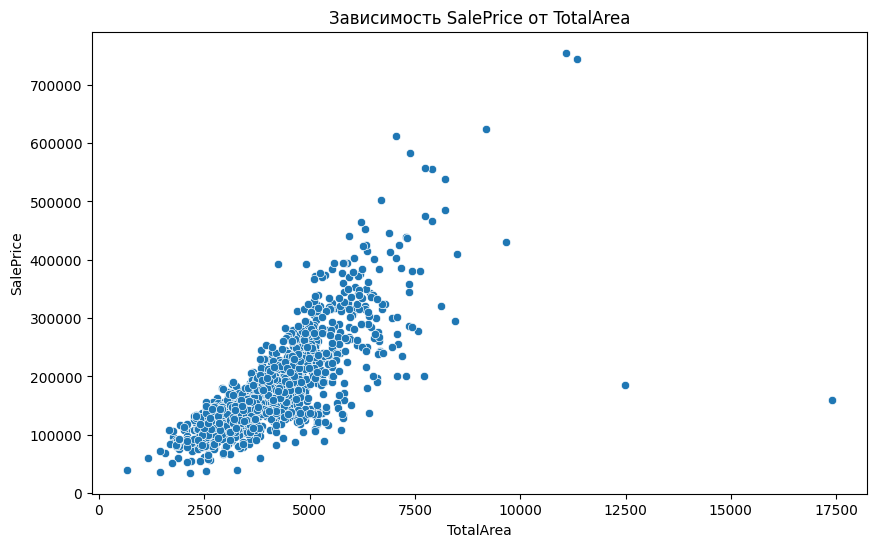

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalArea', y='SalePrice', data=df)
plt.title('Зависимость SalePrice от TotalArea')
plt.xlabel('TotalArea')
plt.ylabel('SalePrice')
plt.show()


Между общей площадью (TotalArea) и продажной ценой (SalePrice) существует положительная корреляция. Это означает, что по мере увеличения общей площади недвижимости, как правило, увеличивается и её продажная цена.

Однако на графике видно некоторое рассеяние точек, особенно при больших значениях площади. Это может свидетельствовать о том, что, несмотря на общую тенденцию роста цены с увеличением площади, существует значительная вариативность в данных. Возможно, на цену также влияют и другие факторы, такие как расположение, состояние недвижимости и другие характеристики.

Также стоит отметить наличие некоторых выбросов (точек, значительно отклоняющихся от основной массы данных), что может указывать на аномальные или исключительные случаи.

#### Scatter Plot для `Age` и `SalePrice`

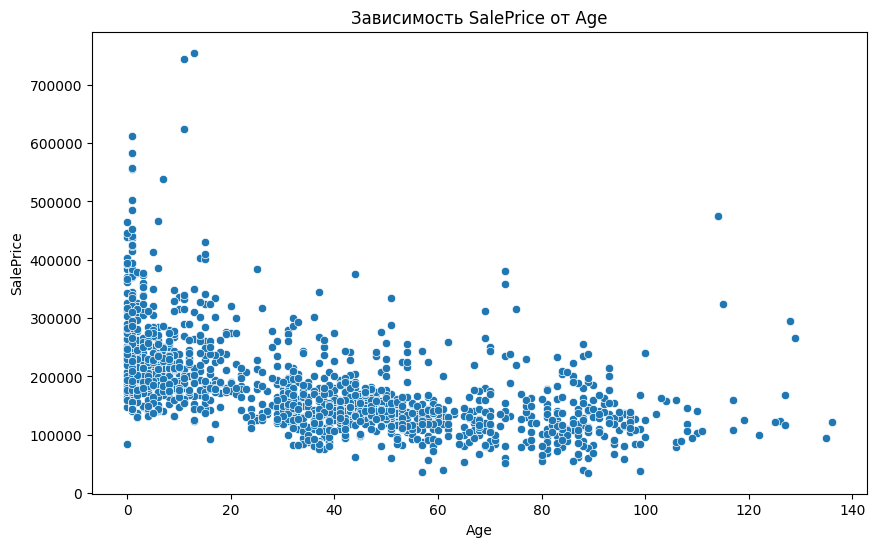

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='SalePrice', data=df)
plt.title('Зависимость SalePrice от Age')
plt.xlabel('Age')
plt.ylabel('SalePrice')
plt.show()


1. Общая тенденция снижения цены с возрастом: Визуализируя зависимость цены продажи (SalePrice) от возраста (Age), заметно, что более новые дома (меньший возраст) имеют тенденцию продаваться дороже по сравнению со старыми домами. Это согласуется с ожиданиями, поскольку новые дома, как правило, имеют более современный дизайн и оборудование, что повышает их стоимость.

2. Высокая вариация цен для новых домов: Для домов с возрастом до 20 лет наблюдается большая разброс цен. Это может быть связано с разными факторами, такими как расположение, площадь, качество материалов и другие особенности каждого отдельного дома.

3. Падение цен по мере старения домов: Примерно после 20 лет можно заметить, что цены домов постепенно стабилизируются, хотя и продолжают снижаться с возрастом.

4. Исключения на графике: В области выше возраста в 80 лет также находятся некоторые дома с относительно высокой ценой. Это может указывать на особые случаи, например, историческую ценность или другие уникальные характеристики этих домов.

Таким образом, основная тенденция показывает, что с увеличением возраста дома его рыночная стоимость, как правило, снижается.

#### Парные графики с использованием Seaborn Pairplot

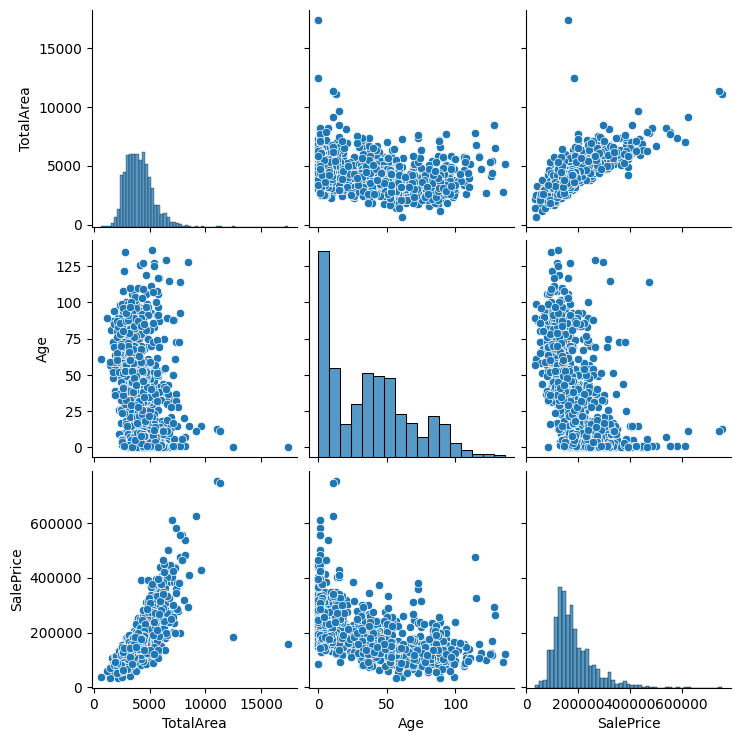

In [71]:
sns.pairplot(df, vars=['TotalArea', 'Age', 'SalePrice'])
plt.show()


На данной матрице диаграмм рассеяния можно сделать следующие выводы:

1. Зависимость общей площади и цены продажи:
   - График "TotalArea vs SalePrice" (в левом нижнем углу) показывает положительную корреляцию между общей площадью дома и ценой его продажи. В общем, чем больше площадь, тем выше цена.

2. Зависимость возраста дома и цены продажи:
   - График "Age vs SalePrice" (в самом нижнем ряду, в центре) показывает отрицательную корреляцию между возрастом дома и ценой его продажи. Старые дома, как правило, имеют более низкие цены.

3. Зависимость общей площади и возраста дома:
   - График "TotalArea vs Age" (в середине левого столбца) показывает, что большие дома, как правило, новее, тогда как маленькие дома могут быть как новыми, так и старыми.

4. Распределение данных:
   - Гистограммы на диагонали показывают распределение данных каждой из переменных:
     - Общая площадь домов (TotalArea) имеет асимметричное распределение с длинным хвостом справа.
     - Возраст домов (Age) также имеет асимметричное распределение, большинство домов имеют возраст менее 75 лет.
     - Цена продажи (SalePrice) имеет также асимметричное распределение с длинным хвостом справа, что указывает на наличие небольшого числа очень дорогих домов.

Эти наблюдения можно использовать для более глубокого анализа, например, для разработки моделей прогнозирования цен на недвижимость или анализа рыночных тенденций.

### 6. Сохраните очищенный и преобразованный набор данных в новый **CSV**-файл под названием `'cleaned_house_prices.csv'`.

In [72]:
# Сохранение в новый CSV-файл
df.to_csv('cleaned_house_prices.csv', index=False)